<a href="https://colab.research.google.com/github/Burhan2409/Machine_learning_Algo/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### **Loading the Dataset** 

In [ ]:
imdb = pd.read_csv('/content/IMDB-Movie-Data.csv')

imdb.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### Checking the Shape , Size and Dimension of the Dataset
From 3rd to 5th Cell

In [ ]:
imdb.shape

(1000, 12)

In [ ]:
imdb.size

12000

In [ ]:
imdb.ndim

2

### **Checking for Null Values and Filling them with mean and median values**

In [ ]:
imdb['Metascore'] = imdb['Metascore'].fillna(imdb['Metascore'].mean())

In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           1000 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
imdb['Revenue (Millions)'] = imdb['Revenue (Millions)'].fillna(imdb['Revenue (Millions)'].mean())

In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


### Train and Test Split Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split


### Separating Features

In [ ]:
X = imdb[['Year','Runtime (Minutes)','Rating','Votes']]
Y = imdb[['Revenue (Millions)']]

### Splitting the train and test dataset 
train data is 75 and test data is 25 

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, Y , random_state=1 , test_size=0.25 , shuffle = True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
from sklearn.metrics import r2_score , confusion_matrix

# R2 score target variable Y

Apply regression on the features

In [ ]:
reg = LinearRegression().fit(X,Y)

In [ ]:
reg

LinearRegression()

In [ ]:
reg.score(X,Y)

0.41195494931631904

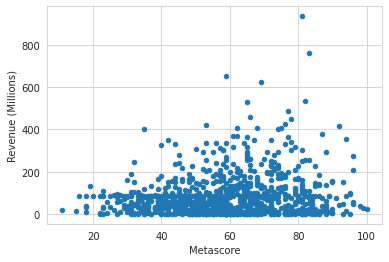

In [ ]:
imdb.plot(kind='scatter',x='Metascore',y='Revenue (Millions)')
plt.show()

In [ ]:
print(reg.coef_)

[[ 4.80448055e+00  1.96105526e-01 -1.77364319e+01  3.81608662e-04]]


In [ ]:
y_pred = reg.predict(X)
y_pred[0:5]

array([[290.02471864],
       [197.00127328],
       [ 84.2762219 ],
       [ 47.24559704],
       [195.068749  ]])

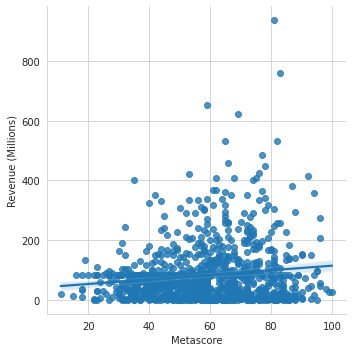

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(
    x='Metascore',
    y='Revenue (Millions)',
    data=imdb
)

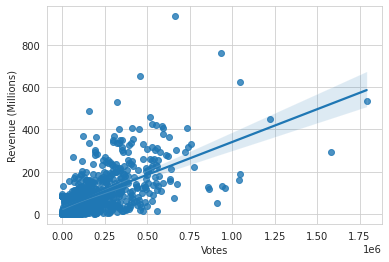

In [ ]:
sns.set_style('whitegrid')
sns.regplot(
    x='Votes',
    y='Revenue (Millions)',
    data=imdb
)

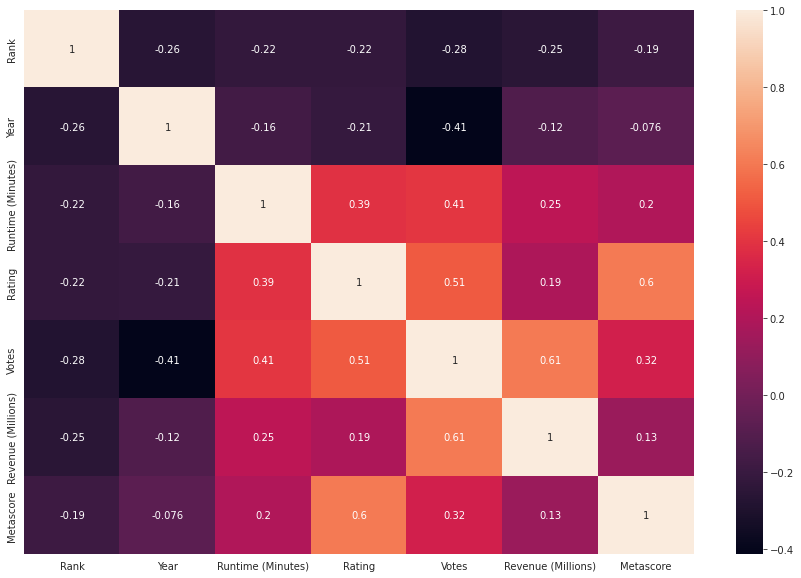

In [ ]:
plt.figure(figsize=(15,10))
df = imdb.corr()
sns.heatmap(df,annot=True)
plt.show()

In [ ]:
df.corr()['Revenue (Millions)'].sort_values(axis=0,ascending=True)
# used for getting the correlation of features with revenue millions and sort their values in ascending 

Rank                 -0.548329
Year                 -0.371952
Metascore             0.156227
Rating                0.319250
Runtime (Minutes)     0.418707
Votes                 0.799630
Revenue (Millions)    1.000000
Name: Revenue (Millions), dtype: float64

In [ ]:
X_test

,Year,Runtime (Minutes),Rating,Votes
507,2009,95,7.7,398972
818,2014,99,5.4,91106
452,2009,108,6.8,126656
368,2012,136,7.0,474320
242,2016,90,5.8,1109
...,...,...,...,...
385,2015,121,7.1,154647
890,2016,104,3.5,202
439,2016,88,5.6,220
135,2012,140,7.3,200090


In [ ]:
m = reg.coef_[0][3]

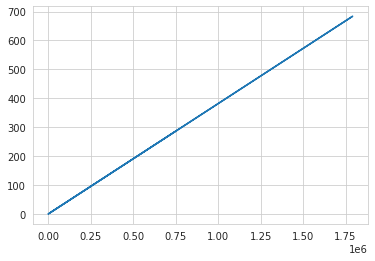

In [ ]:
y = m * imdb['Votes']

x = imdb['Votes']

plt.plot(x,y)
plt.show()